In [ ]:
#Loading needed libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Reading the California Redline data prepared by the Akash
cali_redline_data = gpd.read_file('./data/cali_redlined_numerical_values.geojson')
cali_redline_data.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,NaN,NaN,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,NaN,NaN,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,NaN,NaN,"POLYGON ((-118.53225 34.16201, -118.53177 34.1..."
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,NaN,NaN,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,NaN,NaN,"POLYGON ((-118.50980 34.15691, -118.50848 34.1..."


In [ ]:
# Read rent data to get the geometry data field, to be merged with HPI dataset
# rent_data = gpd.read_file('./data/cali_redlined_numerical_values.geojson')

In [ ]:
cali_redline_data.columns.to_list()

['STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'reweighted_redline_index',
 'ordinal_value',
 'geometry']

In [ ]:
#Reading the HPI csv file downloaded from California Healthy Places Index website
HPI_data = pd.read_csv('./data/HPI.csv')
HPI_data.head()

,CensusTract,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6001400100,2937,0.1,Oakland,94704.0,6001,Alameda,urban_area,1.182028,99.114590,...,96.663673,70.752469,4.766769,15.526047,3.983657,3.779367,0.068097,0.272387,0.851209,Wed13Dec17
1,6001400200,1974,3.5,Oakland,94618.0,6001,Alameda,urban_area,1.325874,99.704863,...,96.612344,78.318136,1.570415,7.396150,7.649443,4.812563,0.101317,0.000000,0.151976,Wed13Dec17
2,6001400300,4865,0.8,Oakland,94618.0,6001,Alameda,urban_area,0.925666,95.932247,...,95.136661,66.927030,10.524152,8.612539,8.201439,5.056526,0.164440,0.102775,0.411100,Wed13Dec17
3,6001400400,3703,0.9,Oakland,94609.0,6001,Alameda,urban_area,1.117603,98.537149,...,68.959322,65.460437,12.098299,7.291385,8.965703,5.320011,0.135026,0.162031,0.567108,Wed13Dec17
4,6001400500,3517,3.6,Oakland,94609.0,6001,Alameda,urban_area,0.562799,83.318363,...,38.855383,50.554450,26.528291,5.914131,9.667330,6.113165,0.454933,0.113733,0.653966,Wed13Dec17


In [ ]:
#Rename the HPI dataset CensusTract column to GEOID, for joining with Cali Redlining dataset
HPI_data = HPI_data.rename(columns = {'CensusTract':'GEOID'})
HPI_data.head()

,GEOID,pop2010,pct2010gq,City,ZIP,County_FIPS,County_Name,UrbanType,hpi2score,hpi2_pctile_pos,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,6001400100,2937,0.1,Oakland,94704.0,6001,Alameda,urban_area,1.182028,99.114590,...,96.663673,70.752469,4.766769,15.526047,3.983657,3.779367,0.068097,0.272387,0.851209,Wed13Dec17
1,6001400200,1974,3.5,Oakland,94618.0,6001,Alameda,urban_area,1.325874,99.704863,...,96.612344,78.318136,1.570415,7.396150,7.649443,4.812563,0.101317,0.000000,0.151976,Wed13Dec17
2,6001400300,4865,0.8,Oakland,94618.0,6001,Alameda,urban_area,0.925666,95.932247,...,95.136661,66.927030,10.524152,8.612539,8.201439,5.056526,0.164440,0.102775,0.411100,Wed13Dec17
3,6001400400,3703,0.9,Oakland,94609.0,6001,Alameda,urban_area,1.117603,98.537149,...,68.959322,65.460437,12.098299,7.291385,8.965703,5.320011,0.135026,0.162031,0.567108,Wed13Dec17
4,6001400500,3517,3.6,Oakland,94609.0,6001,Alameda,urban_area,0.562799,83.318363,...,38.855383,50.554450,26.528291,5.914131,9.667330,6.113165,0.454933,0.113733,0.653966,Wed13Dec17


In [ ]:
#Merge the two datasets on "GEOID" column
cali_redline_and_HPI = pd.merge(cali_redline_data, HPI_data, on='GEOID', how='left')
cali_redline_and_HPI.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,LEB_pctile,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,...,85.025022,76.131779,3.585836,6.633797,9.547288,3.697893,0.134469,0.224115,0.044823,Wed13Dec17
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,...,93.160529,49.412031,9.249209,9.226594,27.069199,4.274084,0.293985,0.226142,0.248756,Wed13Dec17
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,...,99.268574,77.319588,1.529764,5.054872,8.613236,7.016960,0.000000,0.199534,0.266046,Wed13Dec17
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,...,90.517131,77.573926,3.669329,6.345780,8.482625,3.626160,0.151090,0.129506,0.021584,Wed13Dec17
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,...,95.264981,83.150406,1.849593,5.833333,6.483740,2.398374,0.060976,0.060976,0.162602,Wed13Dec17


In [ ]:
#Combine percentages of minority groups into 1 data field
cali_redline_and_HPI['non_white_pct'] = cali_redline_and_HPI['black_pct'] + cali_redline_and_HPI['asian_pct'] + cali_redline_and_HPI['latino_pct'] + cali_redline_and_HPI['multiple_pct'] + cali_redline_and_HPI['NativeAm_pct'] + cali_redline_and_HPI['PacificIsl_pct'] + cali_redline_and_HPI['other_pct']
cali_redline_and_HPI.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,white_pct,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version,non_white_pct
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,...,76.131779,3.585836,6.633797,9.547288,3.697893,0.134469,0.224115,0.044823,Wed13Dec17,23.868221
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,...,49.412031,9.249209,9.226594,27.069199,4.274084,0.293985,0.226142,0.248756,Wed13Dec17,50.587969
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,...,77.319588,1.529764,5.054872,8.613236,7.016960,0.000000,0.199534,0.266046,Wed13Dec17,22.680412
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,...,77.573926,3.669329,6.345780,8.482625,3.626160,0.151090,0.129506,0.021584,Wed13Dec17,22.426074
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,...,83.150406,1.849593,5.833333,6.483740,2.398374,0.060976,0.060976,0.162602,Wed13Dec17,16.849593


In [ ]:
#Assign ordinal values, ranging from 1 to 10, for the minority group percentages for the computation of Spearman Correlation
def ordinal_values(row):
    if row['non_white_pct'] > 0 and row['non_white_pct'] <= 10:
      val = 1
    elif row['non_white_pct'] > 10 and row['non_white_pct'] <= 20:
      val = 2
    elif row['non_white_pct'] > 20 and row['non_white_pct'] <= 30:
      val = 3
    elif row['non_white_pct'] > 30 and row['non_white_pct'] <= 40:
      val = 4
    elif row['non_white_pct'] > 40 and row['non_white_pct'] <= 50:
      val = 5
    elif row['non_white_pct'] > 50 and row['non_white_pct'] <= 60:
      val = 6
    elif row['non_white_pct'] > 60 and row['non_white_pct'] <= 70:
      val = 7
    elif row['non_white_pct'] > 70 and row['non_white_pct'] <= 80:
      val = 8
    elif row['non_white_pct'] > 80 and row['non_white_pct'] <= 90:
      val = 9
    elif row['non_white_pct'] > 90 and row['non_white_pct'] <= 100:
      val = 10
    else:
      val = 0

    return val

cali_redline_and_HPI['non_white_pct_ordinal_values'] = cali_redline_and_HPI.apply(ordinal_values, axis=1)
cali_redline_and_HPI.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,black_pct,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version,non_white_pct,non_white_pct_ordinal_values
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,...,3.585836,6.633797,9.547288,3.697893,0.134469,0.224115,0.044823,Wed13Dec17,23.868221,3
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,...,9.249209,9.226594,27.069199,4.274084,0.293985,0.226142,0.248756,Wed13Dec17,50.587969,6
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,...,1.529764,5.054872,8.613236,7.016960,0.000000,0.199534,0.266046,Wed13Dec17,22.680412,3
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,...,3.669329,6.345780,8.482625,3.626160,0.151090,0.129506,0.021584,Wed13Dec17,22.426074,3
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,...,1.849593,5.833333,6.483740,2.398374,0.060976,0.060976,0.162602,Wed13Dec17,16.849593,2


## HPI Against Redlining Maps

In [ ]:
#Reading the redlining data made available by the Mapping Inequality Project
redline_data = gpd.read_file('./data/holc_ad_data.shp')
redline_data.head()

,polygon_id,state,city,name,holc_id,holc_grade,area_descr,geometry
0,244.0,AL,Birmingham,Mountain Brook Estates and Country Club Garden...,A1,A,"{ ""3n"" : ""50-100 75-125 1936 N/A N/A No rental...","POLYGON ((-86.75678 33.49754, -86.75692 33.495..."
1,193.0,AL,Birmingham,"Redmont Park, Rockridge Park, Warwick Manor, a...",A2,A,"{ ""3n"" : ""N/A N/A No rentals No rentals 55 50-...","POLYGON ((-86.75867 33.50933, -86.76093 33.508..."
2,206.0,AL,Birmingham,"Colonial Hills, Pine Crest (outside city limits)",A3,A,"{ ""2f"" : ""None"", ""31"" : ""75"", ""3b"" : ""Brick ve...","POLYGON ((-86.75678 33.49754, -86.75196 33.501..."
3,203.0,AL,Birmingham,"Grove Park, Hollywood, Mayfair, and Edgewood s...",B1,B,"{ ""2a"" : ""Business men and clerical workers"", ...","POLYGON ((-86.80111 33.48071, -86.80099 33.480..."
4,189.0,AL,Birmingham,Best section of Woodlawn Highlands,B10,B,"{ ""5"" : ""Both sales and rental prices in 1929 ...","POLYGON ((-86.74923 33.53333, -86.74916 33.530..."


In [ ]:
cali_redline_and_HPI.columns.tolist()

['STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'GEOID',
 'NAME',
 'NAMELSAD',
 'MTFCC',
 'FUNCSTAT',
 'ALAND',
 'AWATER',
 'INTPTLAT',
 'INTPTLON',
 'reweighted_redline_index',
 'ordinal_value',
 'geometry',
 'pop2010',
 'pct2010gq',
 'City',
 'ZIP',
 'County_FIPS',
 'County_Name',
 'UrbanType',
 'hpi2score',
 'hpi2_pctile_pos',
 'hpi2_pctile_neg',
 'hpi_top25pct',
 'quintiles',
 'quartiles',
 'economic',
 'economic_pctile',
 'education',
 'education_pctile',
 'housing',
 'housing_pctile',
 'healthcareaccess',
 'healthcareaccess_pctile',
 'neighborhood',
 'neighborhood_pctile',
 'pollution',
 'pollution_pctile',
 'transportation',
 'transportation_pctile',
 'social',
 'social_pctile',
 'insured',
 'insured_pctile',
 'uncrowded',
 'uncrowded_pctile',
 'homeownership',
 'homeownership_pctile',
 'automobile',
 'automobile_pctile',
 'commute',
 'commute_pctile',
 'inpreschool',
 'inpreschool_pctile',
 'inhighschool',
 'inhighschool_pctile',
 'bachelorsed',
 'bachelorsed_pctile',
 'employed',
 'empl

In [ ]:
cali_redline_and_HPI['hpi2_pctile_pos'].head()

0    60.361863
1    15.526755
2    64.878737
3    77.210317
4    91.633517
Name: hpi2_pctile_pos, dtype: float64

In [ ]:
# cali_redline_and_HPI['hpi2_pctile_pos_ordinal_values'] = cali_redline_and_HPI['hpi2_pctile_pos']

In [ ]:
#Assign ordinal values, ranging from 1 to 10 for Moran I spatial correlation
def ordinal_values(row):
    if row['hpi2_pctile_pos'] > 0 and row['hpi2_pctile_pos'] <= 10:
      val = 1
    elif row['hpi2_pctile_pos'] > 10 and row['hpi2_pctile_pos'] <= 20:
      val = 2
    elif row['hpi2_pctile_pos'] > 20 and row['hpi2_pctile_pos'] <= 30:
      val = 3
    elif row['hpi2_pctile_pos'] > 30 and row['hpi2_pctile_pos'] <= 40:
      val = 4
    elif row['hpi2_pctile_pos'] > 40 and row['hpi2_pctile_pos'] <= 50:
      val = 5
    elif row['hpi2_pctile_pos'] > 50 and row['hpi2_pctile_pos'] <= 60:
      val = 6
    elif row['hpi2_pctile_pos'] > 60 and row['hpi2_pctile_pos'] <= 70:
      val = 7
    elif row['hpi2_pctile_pos'] > 70 and row['hpi2_pctile_pos'] <= 80:
      val = 8
    elif row['hpi2_pctile_pos'] > 80 and row['hpi2_pctile_pos'] <= 90:
      val = 9
    elif row['hpi2_pctile_pos'] > 80 and row['hpi2_pctile_pos'] <= 100:
      val = 10
    else:
      val = 0

    return val

cali_redline_and_HPI['hpi2_pctile_pos_ordinal_values'] = cali_redline_and_HPI.apply(ordinal_values, axis=1)
cali_redline_and_HPI.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version,non_white_pct,non_white_pct_ordinal_values,hpi2_pctile_pos_ordinal_values
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,...,6.633797,9.547288,3.697893,0.134469,0.224115,0.044823,Wed13Dec17,23.868221,3,7
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,...,9.226594,27.069199,4.274084,0.293985,0.226142,0.248756,Wed13Dec17,50.587969,6,2
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,...,5.054872,8.613236,7.016960,0.000000,0.199534,0.266046,Wed13Dec17,22.680412,3,7
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,...,6.345780,8.482625,3.626160,0.151090,0.129506,0.021584,Wed13Dec17,22.426074,3,8
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,...,5.833333,6.483740,2.398374,0.060976,0.060976,0.162602,Wed13Dec17,16.849593,2,10


### San Francisco

In [ ]:
#Create a subset for San Francisco County; COUNTYFP == '075'
sf = cali_redline_and_HPI[cali_redline_and_HPI['COUNTYFP']=='075']
sf.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,asian_pct,latino_pct,multiple_pct,NativeAm_pct,PacificIsl_pct,other_pct,version,non_white_pct,non_white_pct_ordinal_values,hpi2_pctile_pos_ordinal_values
382,06,075,025200,6.075025e+09,252,Census Tract 252,G5020,S,657048,0,...,9.983237,27.565655,3.762339,0.372509,0.204880,0.428385,Wed13Dec17,46.153846,5,10
383,06,075,025300,6.075025e+09,253,Census Tract 253,G5020,S,383005,0,...,11.233379,28.610729,3.255387,0.275103,0.389729,0.389729,Wed13Dec17,46.607061,5,10
384,06,075,025402,6.075025e+09,254.02,Census Tract 254.02,G5020,S,300169,0,...,23.076923,28.262363,4.155220,0.446429,0.309066,0.034341,Wed13Dec17,61.984890,7,10
389,06,075,025500,6.075026e+09,255,Census Tract 255,G5020,S,1076566,0,...,43.583992,31.814426,1.959627,0.129855,0.200685,0.141660,Wed13Dec17,79.140597,8,8
390,06,075,025600,6.075026e+09,256,Census Tract 256,G5020,S,562530,0,...,53.702385,27.981488,2.456390,0.160199,0.266999,0.355999,Wed13Dec17,87.326451,9,7


### Moran I Correlation

In [ ]:
#Importing all needed libraries
import pandas as pd
import fiona
from shapely.geometry import shape, mapping
import rtree
import fiona.crs
from libpysal.weights.contiguity import Queen
from libpysal import examples
import numpy as np
import os
import splot
import pysal
from libpysal import weights
import esda
from esda.moran import Moran, Moran_Local,Moran_BV, Moran_Local_BV
from splot.esda import plot_moran_bv_simulation, plot_moran_bv, plot_local_autocorrelation, moran_scatterplot

In [ ]:
#SF Racial Minority and HPI2 Score Correlation

sf2 = sf.dropna(subset=['non_white_pct_ordinal_values','hpi2_pctile_pos_ordinal_values'])
y = sf2['non_white_pct_ordinal_values'].values
w = Queen.from_dataframe(sf2)
w.transform = 'R'
x = sf2['hpi2_pctile_pos_ordinal_values'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
 There is 1 island with id: 71.
  warnings.warn(message)
('WARNING: ', 71, ' is an island (no neighbors)')


ValueError: cannot assign slice from input of different size

## Correlation Values

In [ ]:
#SF Racial Minority and Rental Assistance Correlation

sf_counties = ['San Francisco County']

sf = rent_data[rent_data['county_name'].isin(sf_counties)]

t=['06075980401']
sf = sf.loc[~sf.GEOID.isin(t)]

y = sf['perc_person_of_color'].values
w = Queen.from_dataframe(sf)
w.transform = 'R'
x = sf['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#SF Racial Minority and Rental Assistance Correlation

sf_counties = ['San Francisco County']

sf = rent_data[rent_data['county_name'].isin(sf_counties)]

t=['06075980401']
sf = sf.loc[~sf.GEOID.isin(t)]

y = sf['perc_person_of_color'].values
w = Queen.from_dataframe(sf)
w.transform = 'R'
x = sf['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#Chicago Racial Minority and Rental Assistance Correlation

chicago_counties = ['Cook County']

chicago = rent_data[(rent_data['county_name'].isin(chicago_counties))&(rent_data['state_name']=='Illinois')]

y = chicago['perc_person_of_color'].values
w = Queen.from_dataframe(chicago)
w.transform = 'R'
x = chicago['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#Detroit Racial Minority and Rental Assistance Correlation

detroit_counties = ['Wayne County']

detroit = rent_data[(rent_data['county_name'].isin(detroit_counties))&(rent_data['state_name']=='Michigan')]

y = detroit['perc_person_of_color'].values
w = Queen.from_dataframe(detroit)
w.transform = 'R'
x = detroit['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#St. Louis Racial Minority and Rental Assistance Correlation

sl_counties = ['St. Louis County']

sl = rent_data[rent_data['county_name'].isin(sl_counties)]

y = sl['perc_person_of_color'].values
w = Queen.from_dataframe(sl)
w.transform = 'R'
x = sl['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#Houston Racial Minority and Rental Assistance Correlation

houston_counties = ['Harris County']

houston = rent_data[(rent_data['county_name'].isin(houston_counties))&(rent_data['state_name']=='Texas')]

y = houston['perc_person_of_color'].values
w = Queen.from_dataframe(houston)
w.transform = 'R'
x = houston['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

In [ ]:
#Dallas Racial Minority and Rental Assistance Correlation

dallas_counties = ['Dallas County']

dallas = rent_data[(rent_data['county_name'].isin(dallas_counties))&(rent_data['state_name']=='Texas')]

y = dallas['perc_person_of_color'].values
w = Queen.from_dataframe(dallas)
w.transform = 'R'
x = dallas['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.55787523963193

In [ ]:
#Atlanta Racial Minority and Rental Assistance Correlation

atlanta_counties = ['Fulton County']

atlanta = rent_data[(rent_data['county_name'].isin(atlanta_counties))&(rent_data['state_name']=='Georgia')]

t=['12057980200']
atlanta = atlanta.loc[~atlanta.GEOID.isin(t)]

y = atlanta['perc_person_of_color'].values
w = Queen.from_dataframe(atlanta)
w.transform = 'R'
x = atlanta['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.6931011231593155

In [ ]:
#Nashville Racial Minority and Rental Assistance Correlation

nashville_counties = ['Davidson County']

nashville = rent_data[(rent_data['county_name'].isin(nashville_counties))&(rent_data['state_name']=='Tennessee')]

y = nashville['perc_person_of_color'].values
w = Queen.from_dataframe(nashville)
w.transform = 'R'
x = nashville['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.47659934615671695

In [ ]:
#Boston Racial Minority and Rental Assistance Correlation

boston_counties = ['Suffolk County']

boston = rent_data[(rent_data['county_name'].isin(boston_counties))&(rent_data['state_name']=='Massachusetts')]

y = boston['perc_person_of_color'].values
w = Queen.from_dataframe(boston)
w.transform = 'R'
x = boston['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5022338005674643

In [ ]:
#Newark Racial Minority and Rental Assistance Correlation

newark_counties = ['Essex County']

newark = rent_data[(rent_data['county_name'].isin(newark_counties))&(rent_data['state_name']=='New Jersey')]

y = newark['perc_person_of_color'].values
w = Queen.from_dataframe(newark)
w.transform = 'R'
x = newark['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.8346793619143605

In [ ]:
#Minneapolis Racial Minority and Rental Assistance Correlation

minneapolis_counties = ['Hennepin County']

minneapolis = rent_data[rent_data['county_name'].isin(minneapolis_counties)]

y = minneapolis['perc_person_of_color'].values
w = Queen.from_dataframe(minneapolis)
w.transform = 'R'
x = minneapolis['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5576595162681809

## Plotting Rental Assistance vs Ordinal Redline Index

In [ ]:
#California Data
cali_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/california/cali_redlined_numerical_values.geojson')
cali_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,06,037,139301,6.037139e+09,1393.01,Census Tract 1393.01,G5020,S,2865657,0,+34.1781538,-118.5581265,NaN,NaN,"POLYGON ((-118.57150 34.17758, -118.57148 34.1..."
1,06,037,139302,6.037139e+09,1393.02,Census Tract 1393.02,G5020,S,338289,0,+34.1767230,-118.5383655,NaN,NaN,"POLYGON ((-118.54073 34.18019, -118.54070 34.1..."
2,06,037,139502,6.037140e+09,1395.02,Census Tract 1395.02,G5020,S,1047548,0,+34.1628402,-118.5263110,NaN,NaN,"POLYGON ((-118.53225 34.16201, -118.53177 34.1..."
3,06,037,139600,6.037140e+09,1396,Census Tract 1396,G5020,S,2477482,0,+34.1640599,-118.5101001,NaN,NaN,"POLYGON ((-118.51858 34.15858, -118.51858 34.1..."
4,06,037,139701,6.037140e+09,1397.01,Census Tract 1397.01,G5020,S,3396396,2411,+34.1574290,-118.4954117,NaN,NaN,"POLYGON ((-118.50980 34.15691, -118.50848 34.1..."


In [ ]:
#NY Data
ny_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/new york/ny shapefiles/ny redlining/ny_redlined_numerical_values.geojson')
ny_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,36,081,044800,3.608104e+10,448,Census Tract 448,G5020,S,208002,0,+40.7110219,-073.8026344,3.000000,3,"POLYGON ((-73.80646 40.71206, -73.80556 40.712..."
1,36,081,045800,3.608105e+10,458,Census Tract 458,G5020,S,245281,0,+40.7152626,-073.7909261,2.036919,3,"POLYGON ((-73.79364 40.71382, -73.79362 40.713..."
2,36,081,046200,3.608105e+10,462,Census Tract 462,G5020,S,249611,0,+40.7098547,-073.7879749,3.000250,4,"POLYGON ((-73.79203 40.71107, -73.79101 40.711..."
3,36,081,046300,3.608105e+10,463,Census Tract 463,G5020,S,159415,0,+40.7440007,-073.8710900,3.033299,4,"POLYGON ((-73.87468 40.74335, -73.87423 40.743..."
4,36,081,046400,3.608105e+10,464,Census Tract 464,G5020,S,228767,0,+40.7168637,-073.7869958,2.000000,2,"POLYGON ((-73.79187 40.71379, -73.79085 40.714..."


In [ ]:
#Chicago Data
chicago_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/chicago/chicago_redlined_numerical_values.geojson')
chicago_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,17,031,010300,1.703101e+10,103,Census Tract 103,G5020,S,472017,0,+42.0159407,-087.6665351,2.870394,3,"POLYGON ((-87.67133 42.01937, -87.67121 42.019..."
1,17,031,010400,1.703101e+10,104,Census Tract 104,G5020,S,548761,602605,+42.0064109,-087.6588157,2.520992,3,"POLYGON ((-87.66345 42.01283, -87.66321 42.012..."
2,17,031,010600,1.703101e+10,106,Census Tract 106,G5020,S,495017,0,+42.0062774,-087.6676830,2.947336,3,"POLYGON ((-87.67059 42.00537, -87.67046 42.005..."
3,17,031,020100,1.703102e+10,201,Census Tract 201,G5020,S,411155,0,+42.0157210,-087.6871169,2.007798,3,"POLYGON ((-87.69025 42.01264, -87.69024 42.012..."
4,17,031,280800,1.703128e+10,2808,Census Tract 2808,G5020,S,237357,0,+41.8785967,-087.6889009,4.000000,4,"POLYGON ((-87.69151 41.88111, -87.69147 41.881..."


In [ ]:
#Dallas Data
dallas_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/dallas/dallas_redlined_numerical_values.geojson')
dallas_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,48,113,980100,4.811398e+10,9801,Census Tract 9801,G5020,S,5493433,0,+32.8455619,-096.8494250,3.095023,4,"POLYGON ((-96.86907 32.84576, -96.86893 32.846..."
1,48,113,000605,4.811300e+10,6.05,Census Tract 6.05,G5020,S,537957,0,+32.8104817,-096.8071671,2.086960,3,"POLYGON ((-96.81350 32.81280, -96.81263 32.813..."
2,48,113,007101,4.811301e+10,71.01,Census Tract 71.01,G5020,S,1180246,0,+32.8443119,-096.8175334,1.000000,1,"POLYGON ((-96.82198 32.83702, -96.82187 32.837..."
3,48,113,004201,4.811300e+10,42.01,Census Tract 42.01,G5020,S,2569176,9714,+32.7584519,-096.8299088,2.158202,3,"POLYGON ((-96.83757 32.75015, -96.83756 32.750..."
4,48,113,005901,4.811301e+10,59.01,Census Tract 59.01,G5020,S,2898961,0,+32.6930920,-096.8082157,3.000000,3,"POLYGON ((-96.81470 32.69375, -96.81467 32.695..."


In [ ]:
#Detroit Data
detroit_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/detroit/detroit_redlined_numerical_values.geojson')
detroit_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,26,163,550800,2.616355e+10,5508,Census Tract 5508,G5020,S,2278948,930352,+42.4169429,-082.8975897,1.456514,2,"POLYGON ((-82.91063 42.41719, -82.91055 42.417..."
1,26,163,550900,2.616355e+10,5509,Census Tract 5509,G5020,S,2492682,1655800,+42.4342045,-082.8771963,1.000000,2,"POLYGON ((-82.88940 42.41998, -82.88884 42.421..."
2,26,163,551100,2.616355e+10,5511,Census Tract 5511,G5020,S,4008817,0,+42.4316457,-082.8970265,1.037490,2,"POLYGON ((-82.90970 42.42685, -82.90958 42.427..."
3,26,163,551200,2.616355e+10,5512,Census Tract 5512,G5020,S,1495415,0,+42.4317539,-082.9126087,1.764541,2,"POLYGON ((-82.92277 42.43218, -82.92252 42.432..."
4,26,163,551300,2.616355e+10,5513,Census Tract 5513,G5020,S,1661735,0,+42.4352821,-082.9181837,3.000000,3,"POLYGON ((-82.92766 42.42606, -82.92748 42.426..."


In [ ]:
#Minneapolis Data
minneapolis_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/minneapolis/minneapolis_redlined_numerical_values.geojson')
minneapolis_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,27,053,110000,2.705311e+10,1100,Census Tract 1100,G5020,S,447625,0,+44.9304996,-093.2710511,3.156713,4,"POLYGON ((-93.27456 44.92737, -93.27454 44.930..."
1,27,053,105600,2.705311e+10,1056,Census Tract 1056,G5020,S,479940,0,+44.9654137,-093.2831367,2.213908,3,"POLYGON ((-93.28825 44.96759, -93.28823 44.967..."
2,27,053,002700,2.705300e+10,27,Census Tract 27,G5020,S,653720,0,+44.9951695,-093.3133431,2.366482,3,"POLYGON ((-93.31847 44.99341, -93.31847 44.995..."
3,27,053,102500,2.705310e+10,1025,Census Tract 1025,G5020,S,949074,0,+45.0029873,-093.2534279,3.170737,4,"POLYGON ((-93.26023 45.00308, -93.26025 45.005..."
4,27,053,108600,2.705311e+10,1086,Census Tract 1086,G5020,S,671025,0,+44.9433141,-093.2459630,2.173822,3,"POLYGON ((-93.24995 44.94656, -93.24995 44.948..."


In [ ]:
#Newark Data
newark_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/newark/newark_redlined_numerical_values.geojson')
newark_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,34,031,246300,3.403125e+10,2463,Census Tract 2463,G5020,S,10100083,480508,+40.9104210,-074.2642143,2.000000,2,"POLYGON ((-74.28932 40.92851, -74.28932 40.928..."
1,34,031,124402,3.403112e+10,1244.02,Census Tract 1244.02,G5020,S,3614514,151322,+40.8313394,-074.1354192,3.000000,4,"POLYGON ((-74.15121 40.83169, -74.15059 40.832..."
2,34,031,124312,3.403112e+10,1243.12,Census Tract 1243.12,G5020,S,2650218,13035,+40.8589269,-074.1865351,1.093636,2,"POLYGON ((-74.19787 40.85705, -74.19777 40.857..."
3,34,031,124322,3.403112e+10,1243.22,Census Tract 1243.22,G5020,S,2371061,1700,+40.8468564,-074.1639982,2.172955,3,"POLYGON ((-74.17937 40.84705, -74.17933 40.847..."
4,34,013,020902,3.401302e+10,209.02,Census Tract 209.02,G5020,S,9369925,63571,+40.8217373,-074.3101465,1.982339,2,"POLYGON ((-74.33494 40.82758, -74.33493 40.827..."


In [ ]:
#Tampa Data
tampa_redline = gpd.read_file('/home/jovyan/work/COVIDRedlining/data/tampa/tampa_redlined_numerical_values.geojson')
tampa_redline.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,reweighted_redline_index,ordinal_value,geometry
0,12,057,001100,1.205700e+10,11,Census Tract 11,G5020,S,1631653,45399,+28.0140191,-082.4461143,2.699669,3,"POLYGON ((-82.45131 28.01158, -82.45130 28.012..."
1,12,057,001200,1.205700e+10,12,Census Tract 12,G5020,S,1363104,35703,+28.0156612,-082.4586636,2.000000,2,"POLYGON ((-82.46488 28.01201, -82.46484 28.012..."
2,12,057,004300,1.205700e+10,43,Census Tract 43,G5020,S,748979,143520,+27.9602984,-082.4711251,4.000000,4,"POLYGON ((-82.47671 27.95639, -82.47670 27.957..."
3,12,057,001400,1.205700e+10,14,Census Tract 14,G5020,S,2352954,84840,+28.0037546,-082.4772015,2.000000,2,"POLYGON ((-82.48441 27.99684, -82.48439 27.997..."
4,12,057,001500,1.205700e+10,15,Census Tract 15,G5020,S,1465646,85703,+28.0027970,-082.4655029,2.000000,2,"POLYGON ((-82.47372 28.00234, -82.47359 28.003..."


#### LA

(-118.553885, -118.099326)

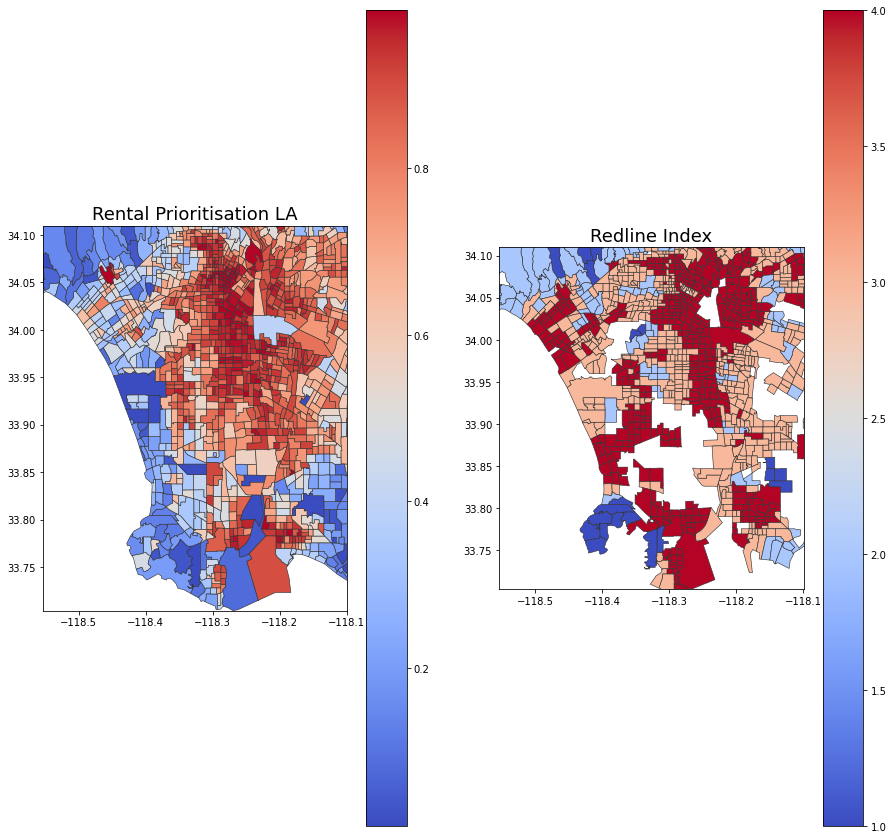

In [ ]:
#Mapping both data for LA
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation LA', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redline Index', fontsize=18)
cali_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(33.703996, 34.109748)
ax1.set_xlim(-118.553885, -118.099326)

ax2.set_ylim(33.703996, 34.109748)
ax2.set_xlim(-118.553885, -118.099326)


#### Bay Area

(-122.518342, -122.354233)

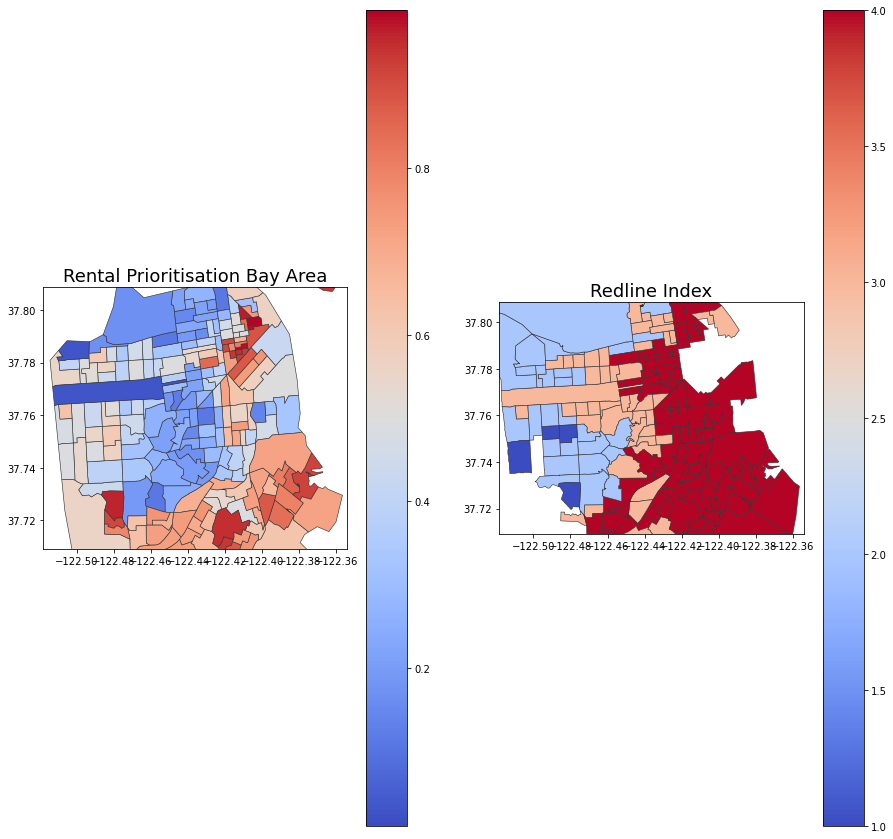

In [ ]:
#Mapping both data for Bay Area
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Bay Area', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redline Index', fontsize=18)
cali_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(37.709061, 37.808676)
ax1.set_xlim(-122.518342, -122.354233)

ax2.set_ylim(37.709061, 37.808676)
ax2.set_xlim(-122.518342, -122.354233)

#### New York

(-74.259376, -73.725166)

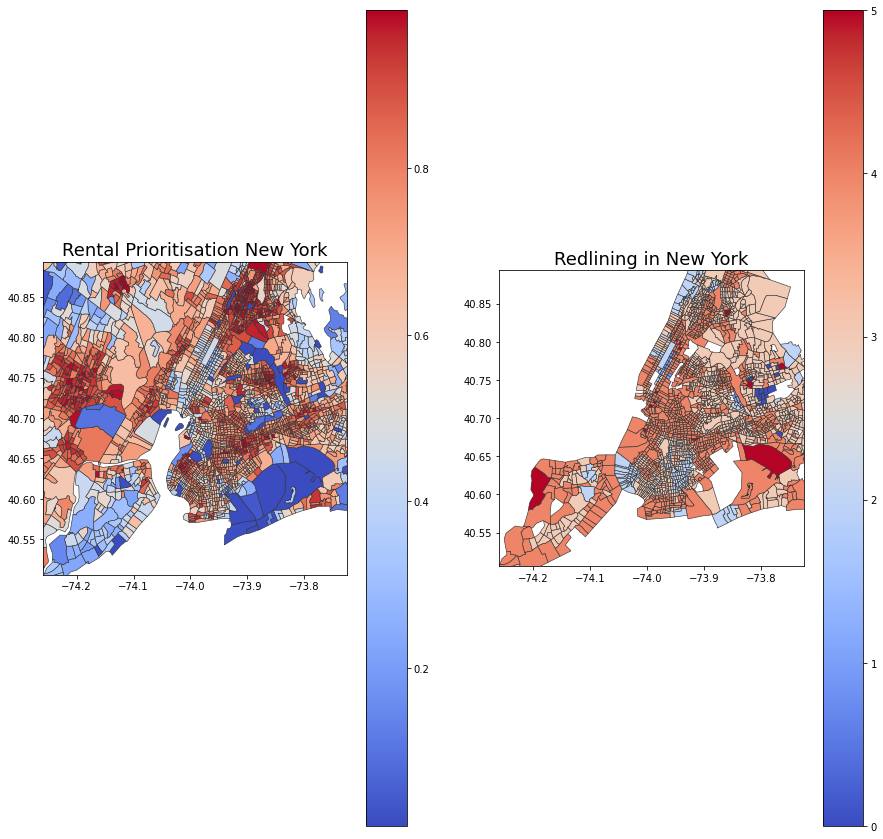

In [ ]:
#Mapping both data for New York City
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation New York', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2',cmap='coolwarm')

ax2.set_title('Redlining in New York', fontsize=18)
ny_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(40.506299, 40.893601)
ax1.set_xlim(-74.259376, -73.725166)

ax2.set_ylim(40.506299, 40.893601)
ax2.set_xlim(-74.259376, -73.725166)

#### Chicago

(-87.684688, -87.508906)

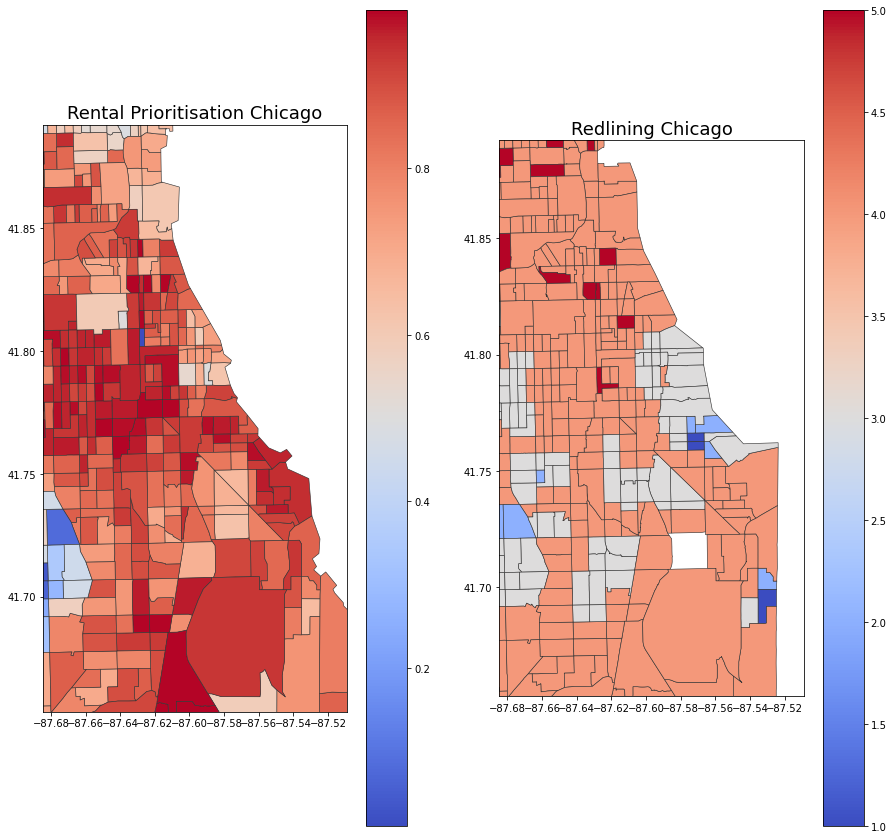

In [ ]:
#Mapping both data for Chicago
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Chicago', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Chicago', fontsize=18)
chicago_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(41.653128, 41.892277)
ax1.set_xlim(-87.684688, -87.508906)

ax2.set_ylim(41.653128, 41.892277)
ax2.set_xlim(-87.684688, -87.508906)


#### Dallas

(-96.914445, -96.628801)

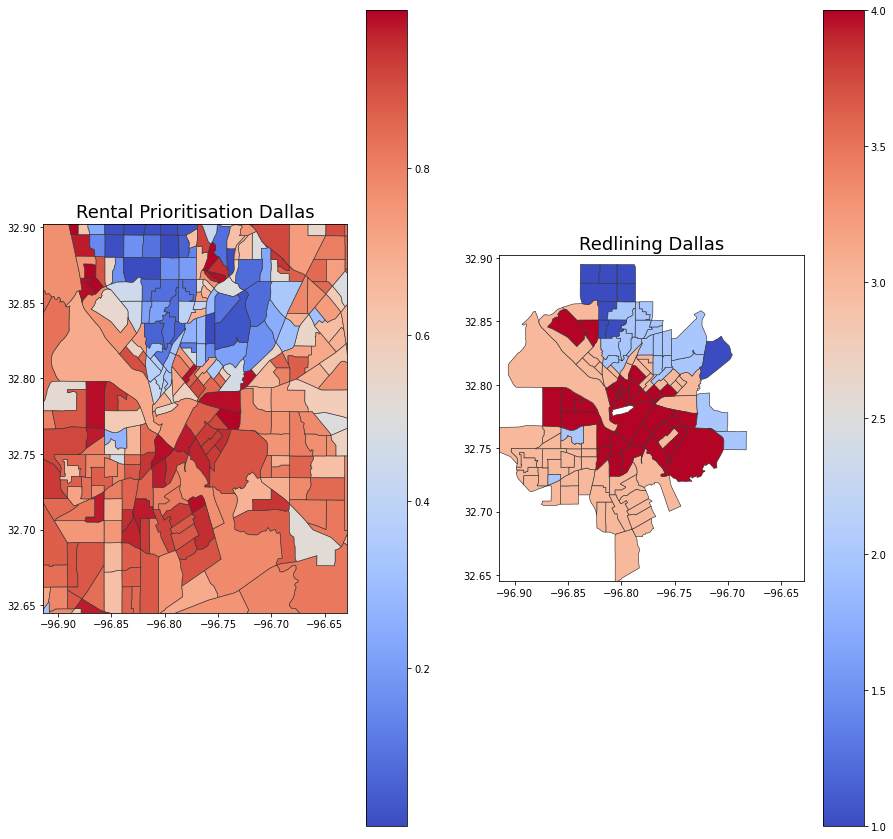

In [ ]:
#Mapping both data for Dallas
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Dallas', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Dallas', fontsize=18)
dallas_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(32.645012, 32.902506)
ax1.set_xlim(-96.914445, -96.628801)

ax2.set_ylim(32.645012, 32.902506)
ax2.set_xlim(-96.914445, -96.628801)

#### Detroit

(-83.243609, -82.898913)

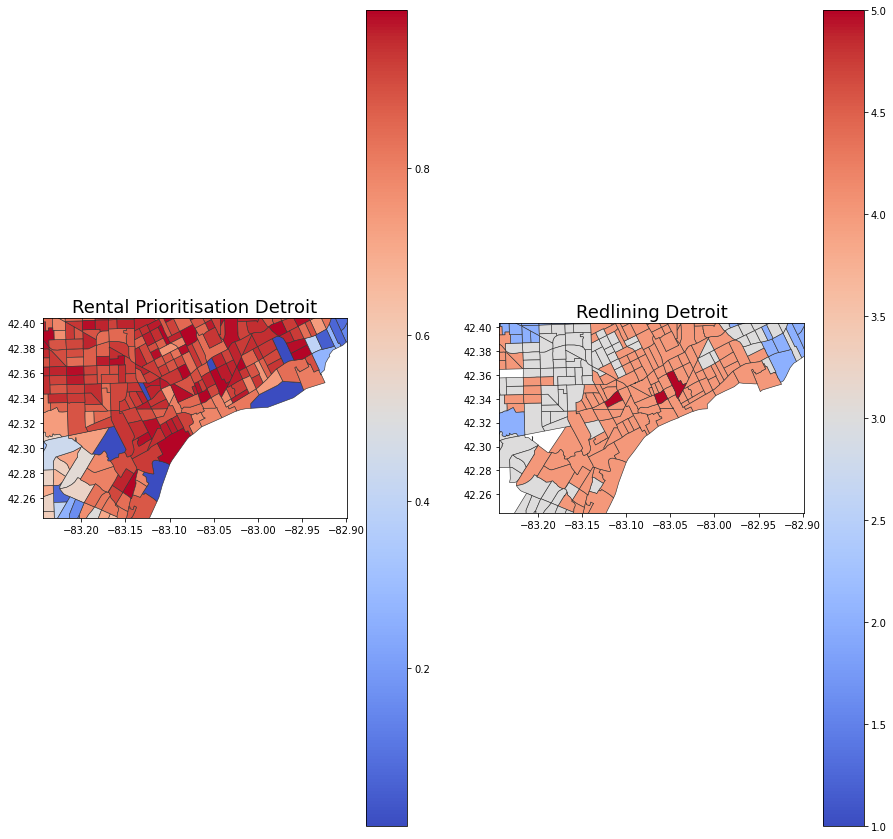

In [ ]:
#Mapping both data for Detroit
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Detroit', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Detroit', fontsize=18)
detroit_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')


ax1.set_ylim(42.244090, 42.403499)
ax1.set_xlim(-83.243609, -82.898913)

ax2.set_ylim(42.244090, 42.403499)
ax2.set_xlim(-83.243609, -82.898913)

#### Minneapolis

(-93.355556, -93.13377)

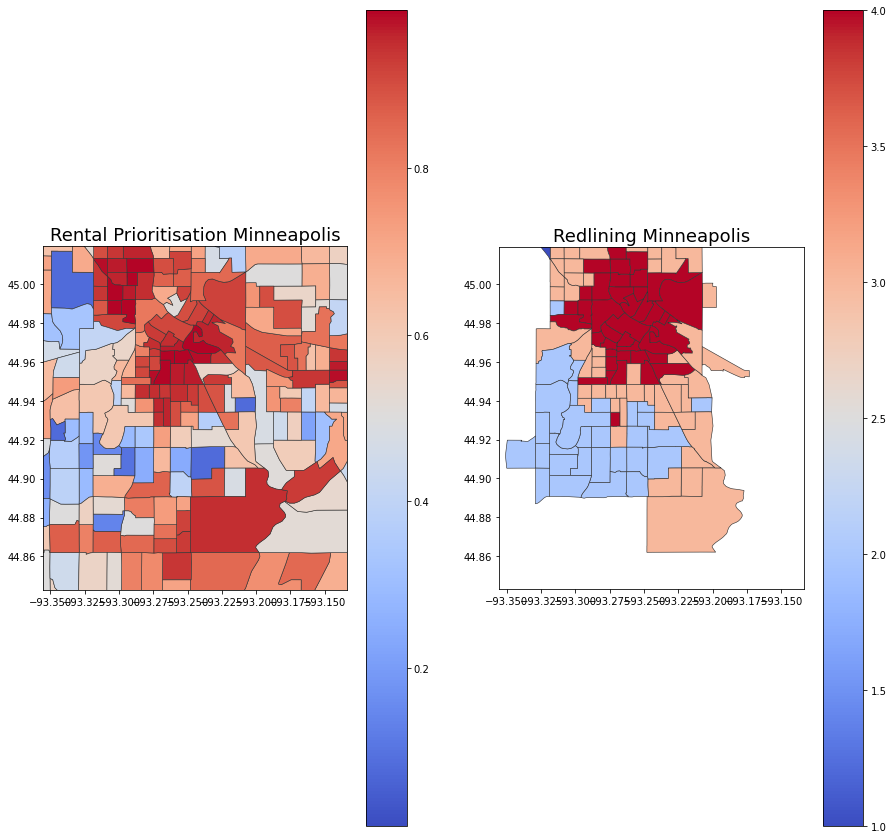

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Minneapolis', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Minneapolis', fontsize=18)
minneapolis_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(44.842875, 45.019335)
ax1.set_xlim(-93.355556,-93.133770)

ax2.set_ylim(44.842875,45.019335)
ax2.set_xlim(-93.355556,-93.133770)

#### Newark

(-74.252472, -74.116516)

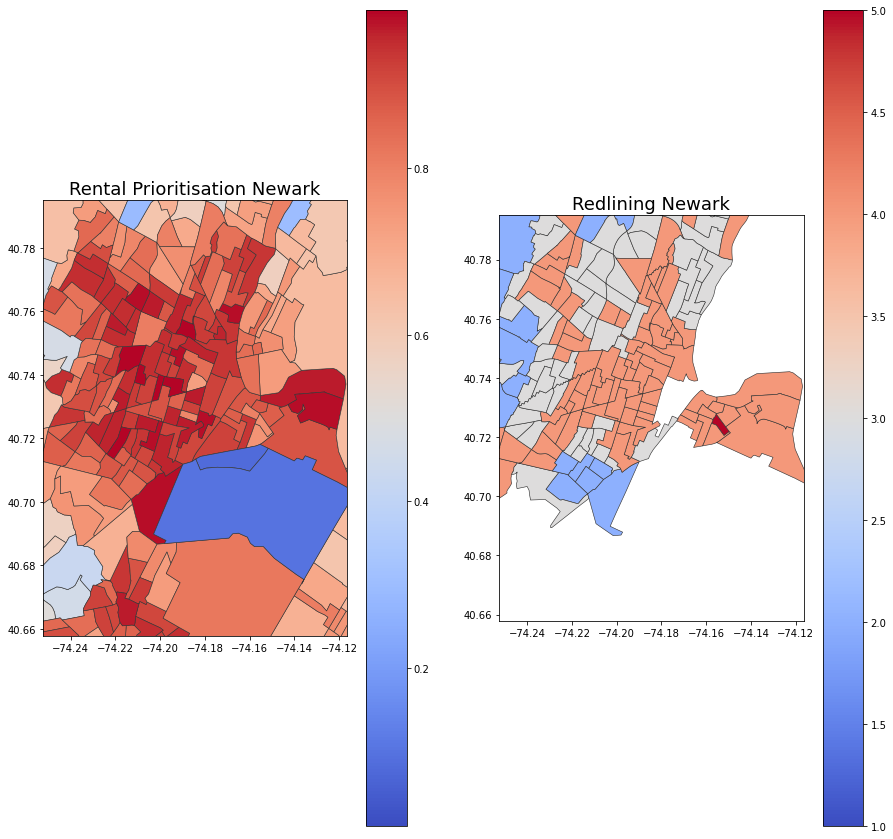

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Newark', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Newark', fontsize=18)
newark_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(40.657722, 40.795098)
ax1.set_xlim(-74.252472,-74.116516)

ax2.set_ylim(40.657722,40.795098)
ax2.set_xlim(-74.252472,-74.116516)

#### Tampa

(-82.562047, -82.383519)

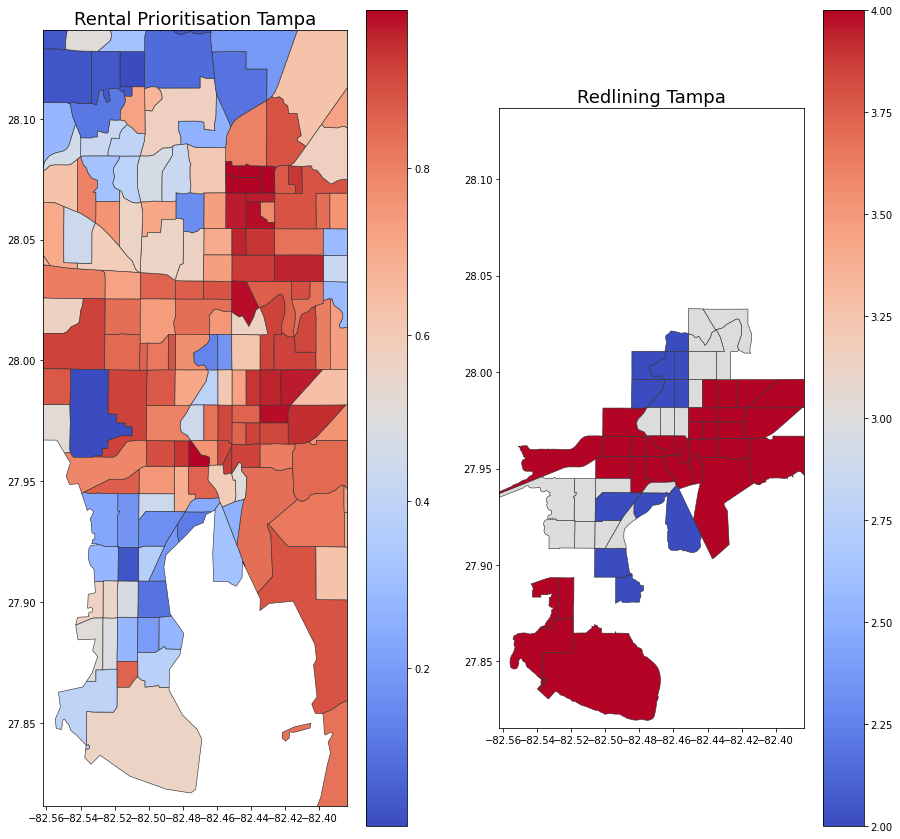

In [ ]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(15, 15))

ax1.set_title('Rental Prioritisation Tampa', fontsize=18)
rent_data.plot(ax=ax1, column='total_index_quantile', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax2.set_title('Redlining Tampa', fontsize=18)
tampa_redline.plot(ax=ax2, column='ordinal_value', legend = True, linewidth=.6, edgecolor='0.2', cmap='coolwarm')

ax1.set_ylim(27.815432, 28.136826)
ax1.set_xlim(-82.562047, -82.383519)

ax2.set_ylim(27.815432, 28.136826)
ax2.set_xlim(-82.562047, -82.383519)

## Spatial Autocorrelations between Redline Index and Rental Assistance

In [ ]:
#Creating separate datasets for each city to run correlations
rent_data['GEOID'] = rent_data['GEOID'].astype(float)
cali_redline_corr = cali_redline[['GEOID','ordinal_value']]
cali_rent_data = rent_data.merge(cali_redline_corr,how='left',on='GEOID')

In [ ]:
cali_rent_data.head()

,GEOID,state_name,county_name,state_fips,county_fips,perc_cost_burdened_under_35k,perc_overcrowding_renter_1.50_or_more,perc_unemployed_laborforce,perc_renters,perc_poverty_12mnth,...,z_score_perc_no_hinsure_quantile,z_score_perc_person_of_color_quantile,z_score_perc_public_assistance_quantile,z_score_perc_foreign_born_quantile,z_score_perc_30hamfi_quantile,z_score_perc_low_income_jobs_lost_quantile,num_ELI,grayed_out,geometry,ordinal_value
0,1.073006e+09,Alabama,Jefferson County,01,01073,0.691943,0.000000,0.171334,0.412351,0.194963,...,0.23,0.96,0.01,0.33,0.47,0.93,100.0,0.0,"MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...",NaN
1,1.073011e+09,Alabama,Jefferson County,01,01073,0.533333,0.012195,0.063052,0.525220,0.097222,...,0.12,0.45,0.01,0.85,0.37,0.83,130.0,0.0,"MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...",NaN
2,1.073013e+09,Alabama,Jefferson County,01,01073,0.582278,0.000000,0.058507,0.606704,0.135747,...,0.80,0.74,0.70,0.99,0.24,0.87,185.0,0.0,"MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...",NaN
3,1.073005e+09,Alabama,Jefferson County,01,01073,0.386667,0.000000,0.040827,0.214047,0.087376,...,0.48,0.66,0.58,0.58,0.23,0.59,40.0,0.0,"MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...",NaN
4,1.073011e+09,Alabama,Jefferson County,01,01073,0.750000,0.000000,0.053528,0.078071,0.087675,...,0.13,0.21,0.63,0.40,0.29,0.64,70.0,0.0,"MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...",NaN


In [ ]:
#LA Rental Assistance and Redline Correlation

la_counties = ['Los Angeles County']

la = cali_rent_data[cali_rent_data['county_name'].isin(la_counties)]

la = la.dropna()

t=['6037401311']
la = la.loc[~la.GEOID.isin(t)]

y = la['ordinal_value'].values
w = Queen.from_dataframe(la)
w.transform = 'R'
x = la['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 8 disconnected components.
  warnings.warn(message)


0.3287586432855363

In [ ]:
#SF Racial Minority and Rental Assistance Correlation

sf_counties = ['San Francisco County']

sf = cali_rent_data[cali_rent_data['county_name'].isin(sf_counties)]

sf = sf.dropna()

t=['06075980401']
sf = sf.loc[~sf.GEOID.isin(t)]

y = sf['ordinal_value'].values
w = Queen.from_dataframe(sf)
w.transform = 'R'
x = sf['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.2914612783168257

In [ ]:
#Creating separate datasets for each city to run correlations
ny_redline_corr = ny_redline[['GEOID','ordinal_value']]
ny_rent_data = rent_data.merge(ny_redline_corr,how='left',on='GEOID')
ny_rent_data.head()

,GEOID,state_name,county_name,state_fips,county_fips,perc_cost_burdened_under_35k,perc_overcrowding_renter_1.50_or_more,perc_unemployed_laborforce,perc_renters,perc_poverty_12mnth,...,z_score_perc_no_hinsure_quantile,z_score_perc_person_of_color_quantile,z_score_perc_public_assistance_quantile,z_score_perc_foreign_born_quantile,z_score_perc_30hamfi_quantile,z_score_perc_low_income_jobs_lost_quantile,num_ELI,grayed_out,geometry,ordinal_value
0,1.073006e+09,Alabama,Jefferson County,01,01073,0.691943,0.000000,0.171334,0.412351,0.194963,...,0.23,0.96,0.01,0.33,0.47,0.93,100.0,0.0,"MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...",NaN
1,1.073011e+09,Alabama,Jefferson County,01,01073,0.533333,0.012195,0.063052,0.525220,0.097222,...,0.12,0.45,0.01,0.85,0.37,0.83,130.0,0.0,"MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...",NaN
2,1.073013e+09,Alabama,Jefferson County,01,01073,0.582278,0.000000,0.058507,0.606704,0.135747,...,0.80,0.74,0.70,0.99,0.24,0.87,185.0,0.0,"MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...",NaN
3,1.073005e+09,Alabama,Jefferson County,01,01073,0.386667,0.000000,0.040827,0.214047,0.087376,...,0.48,0.66,0.58,0.58,0.23,0.59,40.0,0.0,"MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...",NaN
4,1.073011e+09,Alabama,Jefferson County,01,01073,0.750000,0.000000,0.053528,0.078071,0.087675,...,0.13,0.21,0.63,0.40,0.29,0.64,70.0,0.0,"MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...",NaN


In [ ]:
#NY Redline Index and Rental Assistance Correlation
ny_counties = ['Kings County','Richmond County', 'Bronx County', ' Queens County', 'New York County']
ny = ny_rent_data[ny_rent_data['county_name'].isin(ny_counties)]

t=['36061000100']
ny = ny.loc[~ny.GEOID.isin(t)]

ny = ny.dropna()

y = ny['ordinal_value'].values
w = Queen.from_dataframe(ny)
w.transform = 'R'
x = ny['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


0.15423847276408106

In [ ]:
#Creating separate datasets for each city to run correlations
chicago_redline_corr = chicago_redline[['GEOID','ordinal_value']]
chicago_rent_data = rent_data.merge(chicago_redline_corr,how='left',on='GEOID')
chicago_rent_data.head()

,GEOID,state_name,county_name,state_fips,county_fips,perc_cost_burdened_under_35k,perc_overcrowding_renter_1.50_or_more,perc_unemployed_laborforce,perc_renters,perc_poverty_12mnth,...,z_score_perc_no_hinsure_quantile,z_score_perc_person_of_color_quantile,z_score_perc_public_assistance_quantile,z_score_perc_foreign_born_quantile,z_score_perc_30hamfi_quantile,z_score_perc_low_income_jobs_lost_quantile,num_ELI,grayed_out,geometry,ordinal_value
0,1.073006e+09,Alabama,Jefferson County,01,01073,0.691943,0.000000,0.171334,0.412351,0.194963,...,0.23,0.96,0.01,0.33,0.47,0.93,100.0,0.0,"MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...",NaN
1,1.073011e+09,Alabama,Jefferson County,01,01073,0.533333,0.012195,0.063052,0.525220,0.097222,...,0.12,0.45,0.01,0.85,0.37,0.83,130.0,0.0,"MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...",NaN
2,1.073013e+09,Alabama,Jefferson County,01,01073,0.582278,0.000000,0.058507,0.606704,0.135747,...,0.80,0.74,0.70,0.99,0.24,0.87,185.0,0.0,"MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...",NaN
3,1.073005e+09,Alabama,Jefferson County,01,01073,0.386667,0.000000,0.040827,0.214047,0.087376,...,0.48,0.66,0.58,0.58,0.23,0.59,40.0,0.0,"MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...",NaN
4,1.073011e+09,Alabama,Jefferson County,01,01073,0.750000,0.000000,0.053528,0.078071,0.087675,...,0.13,0.21,0.63,0.40,0.29,0.64,70.0,0.0,"MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...",NaN


In [ ]:
#Chicago Redline Index and Rental Assistance Correlation

chicago_counties = ['Cook County']

chicago = chicago_rent_data[(chicago_rent_data['county_name'].isin(chicago_counties))&(chicago_rent_data['state_name']=='Illinois')]

chicago = chicago.dropna()

y = chicago['ordinal_value'].values
w = Queen.from_dataframe(chicago)
w.transform = 'R'
x = chicago['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.24199029865580646

In [ ]:
#Creating separate datasets for each city to run correlations
dallas_redline_corr = dallas_redline[['GEOID','ordinal_value']]
dallas_rent_data = rent_data.merge(dallas_redline_corr,how='left',on='GEOID')
dallas_rent_data.head()

,GEOID,state_name,county_name,state_fips,county_fips,perc_cost_burdened_under_35k,perc_overcrowding_renter_1.50_or_more,perc_unemployed_laborforce,perc_renters,perc_poverty_12mnth,...,z_score_perc_no_hinsure_quantile,z_score_perc_person_of_color_quantile,z_score_perc_public_assistance_quantile,z_score_perc_foreign_born_quantile,z_score_perc_30hamfi_quantile,z_score_perc_low_income_jobs_lost_quantile,num_ELI,grayed_out,geometry,ordinal_value
0,1.073006e+09,Alabama,Jefferson County,01,01073,0.691943,0.000000,0.171334,0.412351,0.194963,...,0.23,0.96,0.01,0.33,0.47,0.93,100.0,0.0,"MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...",NaN
1,1.073011e+09,Alabama,Jefferson County,01,01073,0.533333,0.012195,0.063052,0.525220,0.097222,...,0.12,0.45,0.01,0.85,0.37,0.83,130.0,0.0,"MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...",NaN
2,1.073013e+09,Alabama,Jefferson County,01,01073,0.582278,0.000000,0.058507,0.606704,0.135747,...,0.80,0.74,0.70,0.99,0.24,0.87,185.0,0.0,"MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...",NaN
3,1.073005e+09,Alabama,Jefferson County,01,01073,0.386667,0.000000,0.040827,0.214047,0.087376,...,0.48,0.66,0.58,0.58,0.23,0.59,40.0,0.0,"MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...",NaN
4,1.073011e+09,Alabama,Jefferson County,01,01073,0.750000,0.000000,0.053528,0.078071,0.087675,...,0.13,0.21,0.63,0.40,0.29,0.64,70.0,0.0,"MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...",NaN


In [ ]:
#Dallas Racial Minority and Rental Assistance Correlation

dallas_counties = ['Dallas County']

dallas = dallas_rent_data[(dallas_rent_data['county_name'].isin(dallas_counties))&(dallas_rent_data['state_name']=='Texas')]

dallas = dallas.dropna()

y = dallas['ordinal_value'].values
w = Queen.from_dataframe(dallas)
w.transform = 'R'
x = dallas['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5683876904765088

In [ ]:
#Creating separate datasets for each city to run correlations
detroit_redline_corr = detroit_redline[['GEOID','ordinal_value']]
detroit_rent_data = rent_data.merge(detroit_redline_corr,how='left',on='GEOID')
detroit_rent_data.head()

,GEOID,state_name,county_name,state_fips,county_fips,perc_cost_burdened_under_35k,perc_overcrowding_renter_1.50_or_more,perc_unemployed_laborforce,perc_renters,perc_poverty_12mnth,...,z_score_perc_no_hinsure_quantile,z_score_perc_person_of_color_quantile,z_score_perc_public_assistance_quantile,z_score_perc_foreign_born_quantile,z_score_perc_30hamfi_quantile,z_score_perc_low_income_jobs_lost_quantile,num_ELI,grayed_out,geometry,ordinal_value
0,1.073006e+09,Alabama,Jefferson County,01,01073,0.691943,0.000000,0.171334,0.412351,0.194963,...,0.23,0.96,0.01,0.33,0.47,0.93,100.0,0.0,"MULTIPOLYGON (((-86.90350 33.45676, -86.90093 ...",NaN
1,1.073011e+09,Alabama,Jefferson County,01,01073,0.533333,0.012195,0.063052,0.525220,0.097222,...,0.12,0.45,0.01,0.85,0.37,0.83,130.0,0.0,"MULTIPOLYGON (((-86.82052 33.45868, -86.81621 ...",NaN
2,1.073013e+09,Alabama,Jefferson County,01,01073,0.582278,0.000000,0.058507,0.606704,0.135747,...,0.80,0.74,0.70,0.99,0.24,0.87,185.0,0.0,"MULTIPOLYGON (((-86.80666 33.41088, -86.80642 ...",NaN
3,1.073005e+09,Alabama,Jefferson County,01,01073,0.386667,0.000000,0.040827,0.214047,0.087376,...,0.48,0.66,0.58,0.58,0.23,0.59,40.0,0.0,"MULTIPOLYGON (((-86.71510 33.57597, -86.70716 ...",NaN
4,1.073011e+09,Alabama,Jefferson County,01,01073,0.750000,0.000000,0.053528,0.078071,0.087675,...,0.13,0.21,0.63,0.40,0.29,0.64,70.0,0.0,"MULTIPOLYGON (((-86.64797 33.59205, -86.64629 ...",NaN


In [ ]:
#Detroit Racial Minority and Rental Assistance Correlation

detroit_counties = ['Wayne County']

detroit = detroit_rent_data[(detroit_rent_data['county_name'].isin(detroit_counties))&(detroit_rent_data['state_name']=='Michigan')]

#detroit = detroit.dropna()

y = detroit['ordinal_value'].values
w = Queen.from_dataframe(detroit)
w.transform = 'R'
x = detroit['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

nan

In [ ]:
#Creating separate datasets for each city to run correlations
minneapolis_redline_corr = minneapolis_redline[['GEOID','ordinal_value']]
minneapolis_rent_data = rent_data.merge(minneapolis_redline_corr,how='left',on='GEOID')

In [ ]:
#Minneapolis Racial Minority and Rental Assistance Correlation

minneapolis_counties = ['Hennepin County']

minneapolis = minneapolis_rent_data[minneapolis_rent_data['county_name'].isin(minneapolis_counties)]

minneapolis = minneapolis.dropna()

y = minneapolis['ordinal_value'].values
w = Queen.from_dataframe(minneapolis)
w.transform = 'R'
x = minneapolis['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.4881639708538139

In [ ]:
#Creating separate datasets for each city to run correlations
newark_redline_corr = newark_redline[['GEOID','ordinal_value']]
newark_rent_data = rent_data.merge(newark_redline_corr,how='left',on='GEOID')

In [ ]:
#Newark Racial Minority and Rental Assistance Correlation

newark_counties = ['Essex County']

newark = newark_rent_data[(newark_rent_data['county_name'].isin(newark_counties))&(newark_rent_data['state_name']=='New Jersey')]

newark = newark.dropna()

y = newark['ordinal_value'].values
w = Queen.from_dataframe(newark)
w.transform = 'R'
x = newark['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

0.5746094201946358

In [ ]:
#Creating separate datasets for each city to run correlations
tampa_redline_corr = tampa_redline[['GEOID','ordinal_value']]
tampa_rent_data = rent_data.merge(tampa_redline_corr,how='left',on='GEOID')

In [ ]:
#Tampa Racial Minority and Rental Assistance Correlation

tampa_counties = ['Hillsborough County']

tampa = tampa_rent_data[(tampa_rent_data['county_name'].isin(tampa_counties))&(tampa_rent_data['state_name']=='Florida')]

tampa = tampa.dropna()

y = tampa['ordinal_value'].values
w = Queen.from_dataframe(tampa)
w.transform = 'R'
x = tampa['total_index_quantile'].values
moran = Moran(y,w)
moran_loc = Moran_Local(y, w)
moran_bv = Moran_BV(y, x, w)
moran_loc_bv = Moran_Local_BV(y, x, w)
moran_bv.I

/opt/venv/lib/python3.7/site-packages/libpysal/weights/weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


0.4648110982283353

## Spearman Correlation Redline Index and Rental Assistance

In [ ]:
#LA
from scipy.stats import spearmanr

coef, p = spearmanr(la['total_index_quantile'], la['ordinal_value'])
print(coef)
print(p)

0.3631252801404452
2.19816627867561e-47


In [ ]:
#SF
coef, p = spearmanr(sf['total_index_quantile'], sf['ordinal_value'])
print(coef)
print(p)

0.30776774088739606
4.690547292304931e-05


In [ ]:
#NY
coef, p = spearmanr(ny['total_index_quantile'], ny['ordinal_value'])
print(coef)
print(p)

0.14672480902813265
2.1067912725438816e-08


In [ ]:
#Chicago
coef, p = spearmanr(chicago['total_index_quantile'], chicago['ordinal_value'])
print(coef)
print(p)

0.23736458666654064
1.9317055817164774e-14


In [ ]:
#Dallas
coef, p = spearmanr(dallas['total_index_quantile'], dallas['ordinal_value'])
print(coef)
print(p)

0.6171193824467718
3.7479509026458983e-14


In [ ]:
#Detroit
coef, p = spearmanr(detroit['total_index_quantile'], detroit['ordinal_value'])
print(coef)
print(p)

nan
nan


In [ ]:
#Minneapolis
coef, p = spearmanr(minneapolis['total_index_quantile'], minneapolis['ordinal_value'])
print(coef)
print(p)

0.5984003056380801
3.365288412030128e-13


In [ ]:
#Newark
coef, p = spearmanr(newark['total_index_quantile'], newark['ordinal_value'])
print(coef)
print(p)

0.5574927671296379
4.6867848121101904e-18


In [ ]:
#Tampa
coef, p = spearmanr(tampa['total_index_quantile'], tampa['ordinal_value'])
print(coef)
print(p)

0.5942121815683159
5.578510601611458e-07
